In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlencode

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,8)

# API Demo
## Econ 148 Lecture Notebook

In this lecture notebook, we'll learn how to use Application Programming Interfaces (APIs). APIs are super powerful tools that allow different computer programs to interact with each other. In the context of data science, APIs are often used to access data from different sources.

<br>

<center><img src="data/675px-Rest-API.png"/></center>

<h><center>[Image Source](https://www.seobility.net/en/wiki/REST_API)</center><h>

Using APIs allows you to easily access data and reduces the amount of time it takes to refresh data with updates. In this notebook, we'll explore data from the US Energy Information Administration (EIA).

## Part 1: Get Your API Key

In most cases, you will need an API key in order to access an API. Some API keys involve paperwork or payment, but the EIA provides *free* API keys [here](https://www.eia.gov/opendata/register.php). Once you have submitted your information, you will recieve an confirmation email. Once you have confirmed, you will recieve your key.

In [2]:
my_api_key = "G87DyOv0jwZbDITypJtA7xMF2KfmE7JJ8yzvbaTt"

In [3]:
# a good practice is to store your api key as an environment variable
# and access it using the following method
# `python-dotenv` is also a good package that does that 

# my_api_key = os.environ["eia_key"]

---
## Part 2: Acessing the API

Let's first see how an API call works. In this notebook, we'll be using the `requests` library to access the EIA data. As part of this, we'll use the `get` method to pull the data. We'll also be utilizing an API key, which is a unique identifier, much like a password that allows you to access the data. 

First, we'll create variable for the URL location of the data we want to pull. The EIA has a helpful [browser](https://www.eia.gov/opendata/browser/) that allows you to select what types of data you would like to use and autogenerate a URL to use. In this example, we'll be looking at $CO_2$ or carbon dioxide emissions.

Also, refer to EIA's API documentation [here](https://www.eia.gov/opendata/documentation.php). 

In [4]:
# base url
base_url = "https://api.eia.gov/v2"

# endpoint
endpoint = "/co2-emissions/co2-emissions-aggregates/data/"

# params
params = {
    "api_key": my_api_key, 
    "facets[stateId][]": "CA", 
    "data[]": "value"
}
url_params = urlencode(params)

# forms the url
url = f"{base_url}{endpoint}?{url_params}"

# makes a GET request to pull the data
response = requests.get(url)

# checks if the request encounters an error
if response.status_code not in range(200, 299):
    raise Exception(f"Fetch request failed (Error: {response.status_code})")

# The response from the API in JSON form
r = response.json()

In [5]:
r["response"]["data"][0]

{'period': 1970,
 'sectorId': 'RC',
 'sector-name': 'Residential carbon dioxide emissions',
 'fuelId': 'CO',
 'fuel-name': 'Coal',
 'stateId': 'CA',
 'state-name': 'California',
 'value': 0.128968,
 'value-units': 'million metric tons of CO2'}

As you can see, the data from the API is not in the normal tabular/CSV format we are used to seeing. That is because the data is being stored in a format called JSON or JavaScript Object Notation. This data structure uses a series of dictionaries to store data in key-value pairs. To convert the JSON file into something that we can manipulate with `pandas`, we can use the `from_dict` method.

In [6]:
emissions = pd.DataFrame.from_dict(r["response"]["data"])
emissions.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,1970,RC,Residential carbon dioxide emissions,CO,Coal,CA,California,0.128968,million metric tons of CO2
1,1970,RC,Residential carbon dioxide emissions,PE,Petroleum,CA,California,1.375131,million metric tons of CO2
2,1970,RC,Residential carbon dioxide emissions,NG,Natural Gas,CA,California,30.877841,million metric tons of CO2
3,1970,RC,Residential carbon dioxide emissions,TO,All Fuels,CA,California,32.381940,million metric tons of CO2
4,1970,CC,Commercial carbon dioxide emissions,CO,Coal,CA,California,0.101312,million metric tons of CO2


---
## Part 3: Data Exploration!

Now that we have the data, let's explore it. Let's start by looking at carbon dioxide emisssion in California over time.

We can start by selecting `Total carbon dioxide emissions from all sectors` and `All Fuels`

In [7]:
ca_all_emissions_all_fuels = emissions[(emissions["sectorId"]=="TT") &
                                       (emissions["fuel-name"]=="All Fuels")].sort_values("period")
ca_all_emissions_all_fuels.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
20,1970,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,294.366786,million metric tons of CO2
44,1971,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,305.827812,million metric tons of CO2
68,1972,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,312.715431,million metric tons of CO2
92,1973,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,329.277423,million metric tons of CO2
116,1974,TT,Total carbon dioxide emissions from all sectors,TO,All Fuels,CA,California,304.462225,million metric tons of CO2


Now let's plot these values over time. The `plt.plot` method plots a line plot using the first parameter as the x-axis and the second parameter as the y-axis. Labels are added using `plt.xlabel()` and `plt.ylabel()` for each axis. Finally, a title is added with the `plt.title()` method.

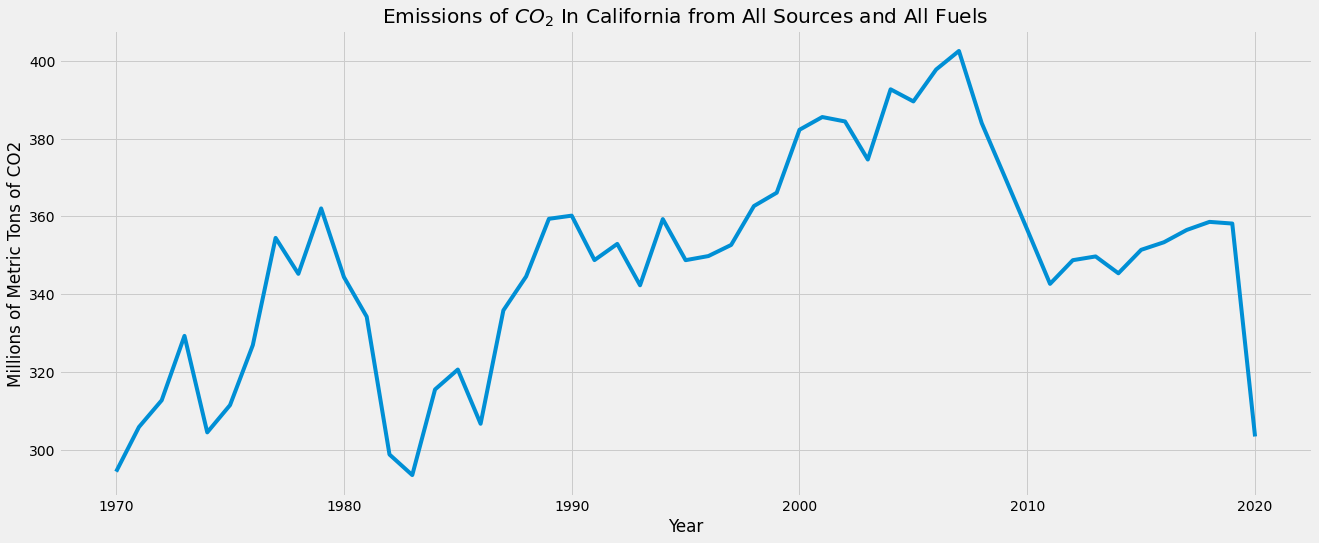

In [8]:
plt.plot(ca_all_emissions_all_fuels["period"],ca_all_emissions_all_fuels["value"])
plt.xlabel("Year")
plt.ylabel("Millions of Metric Tons of CO2")
plt.title("Emissions of $CO_2$ In California from All Sources and All Fuels")
plt.show();

Next, we will be selecting total carbon dioxide emissions from all sectors and from coal. 

In [9]:
ca_all_emissions_coal=emissions[(emissions["sectorId"]=="TT") &
                                (emissions["fuel-name"]=="Coal")].sort_values("period")
ca_all_emissions_coal.head()

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
21,1970,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,5.637264,million metric tons of CO2
45,1971,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,4.643243,million metric tons of CO2
69,1972,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,4.318793,million metric tons of CO2
93,1973,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,6.093156,million metric tons of CO2
117,1974,TT,Total carbon dioxide emissions from all sectors,CO,Coal,CA,California,5.528723,million metric tons of CO2


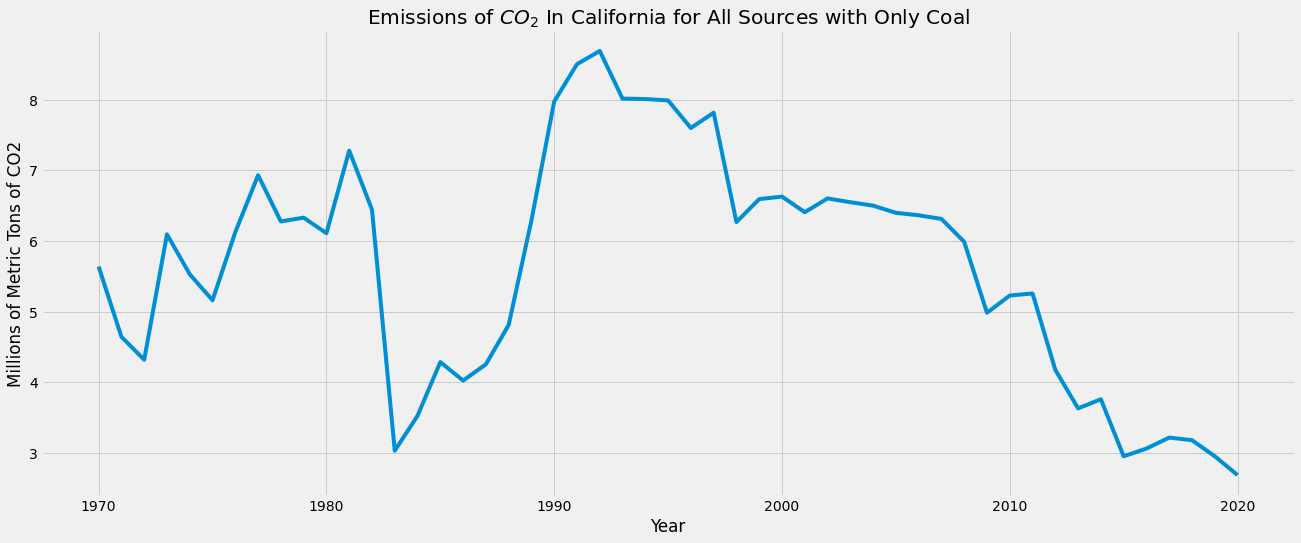

In [10]:
plt.plot(ca_all_emissions_coal["period"], ca_all_emissions_coal["value"])
plt.xlabel("Year")
plt.ylabel("Millions of Metric Tons of CO2")
plt.title("Emissions of $CO_2$ In California for All Sources with Only Coal")
plt.show();

---
## Part 4: Renewable Energy

Now that we have done some work with the API, let's look at a different data set: renewable energy in California.

We can find it by going to the [EIA API Browser](https://www.eia.gov/opendata/browser/) and select "Short Term Energy Outlook" in the "Select Route" dropdown. Then hit the submit button. An API URL should appear below. Now we can copy and paste it into the variable `renewables_endpoint` below.

In [11]:
endpoint_renewables = "/steo/data/"

Now we'll be selecting just the data we are interested in. `RTEPGEN_CA` is electricity generated from all types of renewable sources in California.

This data includes values about several renewable power sources including solar, wind, and hydroelectric. 

The API uses additional parameters as part of the URL used. These are shown here:

$$\underbrace{\normalsize\text{&facets}}_{\qquad \normalsize\text{Allows filters to be used.}}\underbrace{\normalsize\text{[seriesId][]=RTEPGEN_CA}}_{\qquad \normalsize \text{Selects just the `RTEPGEN_CA` series.}}\underbrace{\normalsize\text{&data[]=value}}_{\qquad \normalsize \text{Pulls the data values.}}$$

Your API key is also used in URL to authenticate the request.

In [12]:
# Selects just California and pulls data values
params_renewables = {
    "api_key": my_api_key, 
    "facets[seriesId][]": "RTEPGEN_CA", 
    "data[]": "value"
}
url_params_renewables = urlencode(params_renewables)

# forms the url
url_renewables = f"{base_url}{endpoint_renewables}?{url_params_renewables}"

# makes a GET request to pull the data
response_renewables = requests.get(url_renewables)

# checks if the request encounters an error
if response_renewables.status_code not in range(200, 299):
    raise Exception(f"Fetch request failed (Error: {response_renewables.status_code})")

# The response from the API in JSON form
renewables_json = response_renewables.json()

In [13]:
renewables_json["response"]["data"][0]

{'period': '2010-01',
 'seriesId': 'RTEPGEN_CA',
 'seriesDescription': 'Electric power sector net generation from renewable energy (all types), California',
 'value': 3.061592663,
 'unit': 'billion kilowatthours'}

In [14]:
# Takes the JSON version of the data and converts it to a pandas dataframe
renewables = pd.DataFrame.from_dict(renewables_json["response"]["data"])

# Converts the period data type to datetime. This helps with plotting later on
renewables["period"]=pd.to_datetime(renewables["period"])
renewables

,period,seriesId,seriesDescription,value,unit
0,2010-01-01,RTEPGEN_CA,Electric power sector net generation from rene...,3.061593,billion kilowatthours
1,2010-02-01,RTEPGEN_CA,Electric power sector net generation from rene...,3.100906,billion kilowatthours
2,2010-03-01,RTEPGEN_CA,Electric power sector net generation from rene...,4.017024,billion kilowatthours
3,2010-04-01,RTEPGEN_CA,Electric power sector net generation from rene...,4.632190,billion kilowatthours
4,2010-05-01,RTEPGEN_CA,Electric power sector net generation from rene...,6.191605,billion kilowatthours
...,...,...,...,...,...
175,2024-08-01,RTEPGEN_CA,Electric power sector net generation from rene...,11.994820,billion kilowatthours
176,2024-09-01,RTEPGEN_CA,Electric power sector net generation from rene...,10.337130,billion kilowatthours
177,2024-10-01,RTEPGEN_CA,Electric power sector net generation from rene...,9.294002,billion kilowatthours
178,2024-11-01,RTEPGEN_CA,Electric power sector net generation from rene...,8.566371,billion kilowatthours


Now we can plot the electric power sector net generation from renewable energy in California from 2010 to 2024 (estimates). 

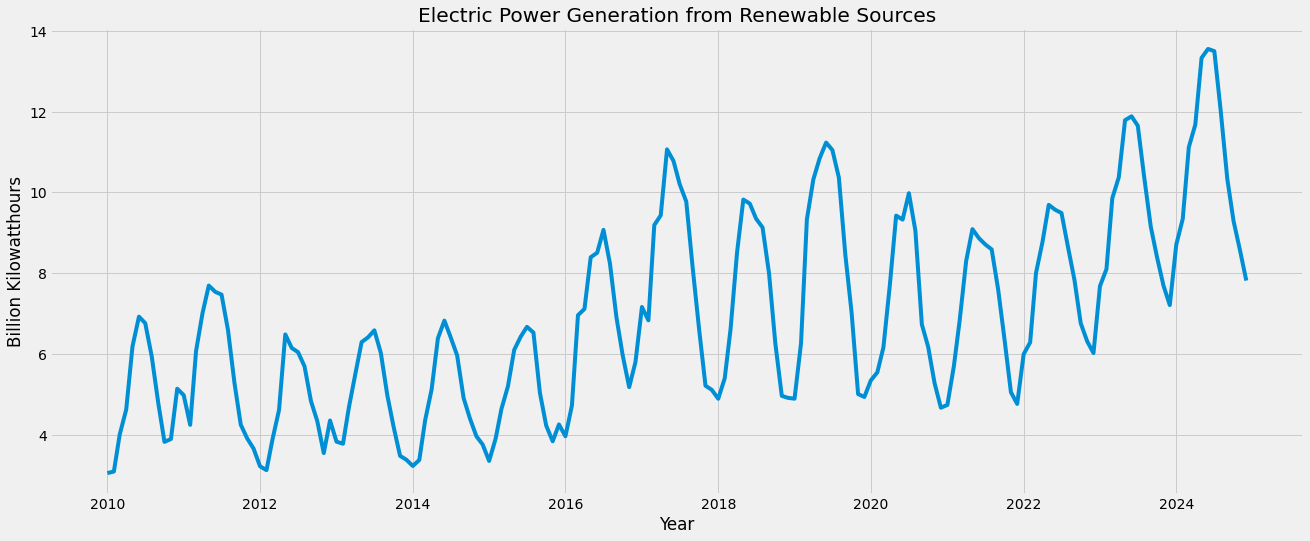

In [15]:
plt.plot(renewables["period"],renewables["value"])
plt.title("Electric Power Generation from Renewable Sources")
plt.xlabel("Year")
plt.ylabel("Billion Kilowatthours")
plt.show();

Let's explore this difference a little further by looking at the individual sources of renewable energy like solar and wind. 

Similar to earlier, we'll be using the data explorer on the [EIA website](https://www.eia.gov/opendata/browser/steo). Make sure to select `Short Term Energy Outlook` from the `Select route` dropdown. 

Then click on the `FILTER BY FACET` tab. Click `Unique Series Identifier` from the `Select Filter` dropdown. In the `Search Filters` field, type in `California`.

Find the `SERIESID` that corresponds with `Electricity power sector net generation from utility-scale solar, California`. (The series ID is a string of capitalized letters with an underscore.) 


In [16]:
# Selects just California and pulls data values
params_utility_solar = {
    "api_key": my_api_key, 
    "facets[seriesId][]": "SOEPGEN_CA", 
    "data[]": "value"
}
url_params_utility_solar = urlencode(params_utility_solar)

# forms the url
url_utility_solar = f"{base_url}{endpoint_renewables}?{url_params_utility_solar}"

# makes a GET request to pull the data
response_utility_solar = requests.get(url_utility_solar)

# checks if the request encounters an error
if response_utility_solar.status_code not in range(200, 299):
    raise Exception(f"Fetch request failed (Error: {response_utility_solar.status_code})")

# The response from the API in JSON form
utility_solar_json = response_utility_solar.json()

In [17]:
utility_solar_json["response"]["data"][0]

{'period': '2010-01',
 'seriesId': 'SOEPGEN_CA',
 'seriesDescription': 'Electric power sector net generation from utility-scale solar, California',
 'value': 0.002450996,
 'unit': 'billion kilowatthours'}

Now that we have our data in JSON form, we can convert it to a `pandas` dataframe.

In [18]:
# Takes the JSON version of the data and converts it to a pandas dataframe
utility_solar=pd.DataFrame.from_dict(utility_solar_json["response"]["data"])

# Converts the period data type to datetime. This helps with plotting later on
utility_solar["period"]=pd.to_datetime(utility_solar["period"])
utility_solar.head()

,period,seriesId,seriesDescription,value,unit
0,2010-01-01,SOEPGEN_CA,Electric power sector net generation from util...,0.002451,billion kilowatthours
1,2010-02-01,SOEPGEN_CA,Electric power sector net generation from util...,0.020931,billion kilowatthours
2,2010-03-01,SOEPGEN_CA,Electric power sector net generation from util...,0.051916,billion kilowatthours
3,2010-04-01,SOEPGEN_CA,Electric power sector net generation from util...,0.076926,billion kilowatthours
4,2010-05-01,SOEPGEN_CA,Electric power sector net generation from util...,0.108241,billion kilowatthours


Now we will make a visualization of utility-scale solar using the `value` column from the `utility_solar` dataframe. 

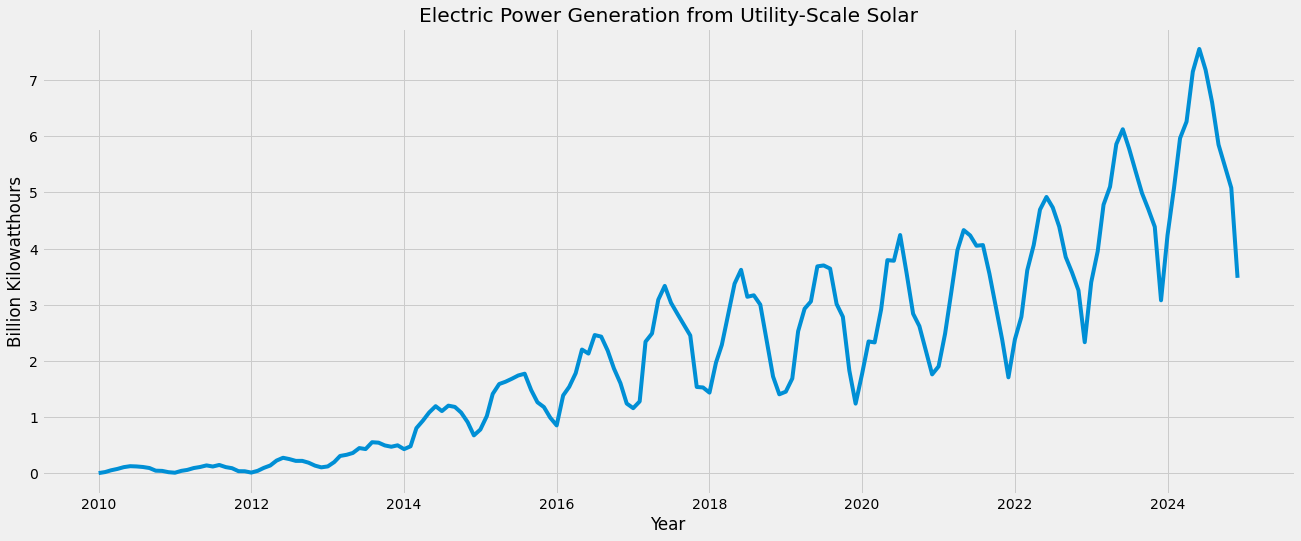

In [19]:
plt.plot(utility_solar["period"],utility_solar["value"])
plt.title("Electric Power Generation from Utility-Scale Solar")
plt.xlabel("Year")
plt.ylabel("Billion Kilowatthours")
plt.show();

Does this visualization help explain the fluctuations in electricity generation from before?